<a href="https://colab.research.google.com/github/ECamposSoria/Data_Science_obesity/blob/main/Data_StoryTelling_Campos_Soria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data science/entregable 1 y 2/ObesityDataSet_raw_and_data_sinthetic.csv')

# Causas de obesidad

¿Cuales son las causas de obesidad más comunes?


# preguntas de interes
### Preguntas principales o primarias
* ¿Qué variables tienen mayor influencia en la obesidad?
### Preguntas secundarias (nos ayudarán a contestar las principales)
* ¿Existen variables que actúen como confundidores en el análisis?
* ¿Cómo se distribuyen las variables en diferentes niveles de obesidad?
* ¿Existen interacciones significativas entre las variables que podrían afectar su relación con la obesidad?
* ¿Cómo se distribuye las obesidad en diferentes poblaciones?
* ¿Qué variables muestran una tendencia temporal en relación con la obesidad?


# analisis exploratorio

In [ ]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
sample_size = len(df)
variables = df.columns.tolist()

sample_size, variables

(2111,
 ['Gender',
  'Age',
  'Height',
  'Weight',
  'family_history_with_overweight',
  'FAVC',
  'FCVC',
  'NCP',
  'CAEC',
  'SMOKE',
  'CH2O',
  'SCC',
  'FAF',
  'TUE',
  'CALC',
  'MTRANS',
  'NObeyesdad'])

## Específicos del Conjunto de Datos

### Tamaño de la muestra
El conjunto de datos contiene 2111 observaciones.

### Variables
El conjunto de datos incluye las siguientes variables o columnas:
1. **Género**: Identificación del género del individuo.
2. **Edad**: Edad del individuo.
3. **Altura**: Altura del individuo.
4. **Peso**: Peso del individuo.
5. **Historial familiar con sobrepeso**: Indica si hay un historial de sobrepeso en la familia.
6. **FAVC (Consumo frecuente de alimentos altos en calorías)**: Indica el consumo frecuente de alimentos altos en calorías.
7. **FCVC (Frecuencia de consumo de vegetales)**: Indica la frecuencia con la que se consumen vegetales.
8. **NCP (Número de comidas principales)**: Número de comidas principales al día.
9. **CAEC (Consumo de alimentos entre comidas)**: Indica si se consumen alimentos entre las comidas.
10. **SMOKE (Fumar)**: Indica si el individuo fuma.
11. **CH2O (Consumo diario de agua)**: Cantidad de agua consumida diariamente.
12. **SCC (Monitoreo del consumo de calorías)**: Indica si el individuo monitorea su consumo de calorías.
13. **FAF (Frecuencia de actividad física)**: Frecuencia con la que se realiza actividad física.
14. **TUE (Tiempo usando dispositivos tecnológicos)**: Cantidad de tiempo dedicado a dispositivos tecnológicos.
15. **CALC (Consumo de alcohol)**: Indica el consumo de alcohol.
16. **MTRANS (Medio de transporte utilizado)**: Tipo de transporte utilizado regularmente.
17. **NObeyesdad (Nivel de obesidad)**: Clasificación del nivel de obesidad del individuo.



In [ ]:
# Comprobación de valores faltantes (nulos) en el conjunto de datos
valores_faltantes = df.isnull().sum()

# Comprobación de filas duplicadas en el conjunto de datos
filas_duplicadas = df.duplicated().sum()

# Si hay valores faltantes o filas duplicadas, los manejaremos
manejo_valores_faltantes = None
manejo_filas_duplicadas = None

if valores_faltantes.sum() > 0:
    # Código para manejar valores faltantes (p.ej., eliminar o imputar)
    # Para este ejemplo, eliminaremos las filas con cualquier valor faltante
    df.dropna(inplace=True)
    manejo_valores_faltantes = "Se han eliminado las filas con valores faltantes"

if filas_duplicadas > 0:
    # Código para manejar filas duplicadas
    # Para este ejemplo, eliminaremos las filas duplicadas
    df.drop_duplicates(inplace=True)
    manejo_filas_duplicadas = "Se han eliminado las filas duplicadas"


## Resultados

- **Valores Faltantes**: No hay valores faltantes en el conjunto de datos.
- **Filas Duplicadas**: Se encontraron 24 filas duplicadas y se han eliminado.
- **Manejo de Valores Faltantes**: No fue necesario manejar valores faltantes.
- **Manejo de Filas Duplicadas**: Se han eliminado las filas duplicadas.


In [ ]:
# ver nulos
null_check = df.isnull().sum()

# ver duplicados
duplicate_check = df.duplicated().sum()

null_check, duplicate_check

(Gender                            0
 Age                               0
 Height                            0
 Weight                            0
 family_history_with_overweight    0
 FAVC                              0
 FCVC                              0
 NCP                               0
 CAEC                              0
 SMOKE                             0
 CH2O                              0
 SCC                               0
 FAF                               0
 TUE                               0
 CALC                              0
 MTRANS                            0
 NObeyesdad                        0
 dtype: int64,
 0)

In [ ]:
# remover duplicados
df.drop_duplicates(inplace=True)

# ver duplicados
duplicate_check_after_removal = df.duplicated().sum()

duplicate_check_after_removal

0

In [ ]:
# ver tipos de datos
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

# ¿Existen variables que actúen como confundidores en el análisis?

<ipython-input-9-9ae4ab28ac82>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


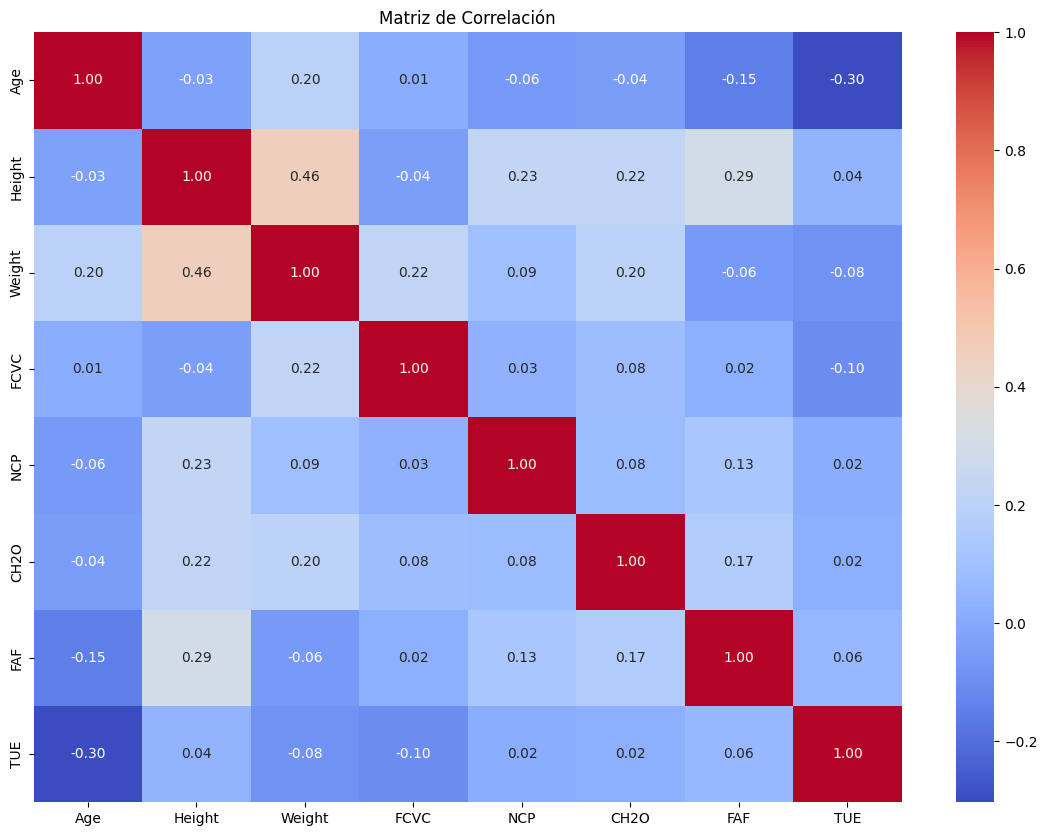

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#  Calcular matriz de correlacion para variables numericas
correlation_matrix = df.corr()

#  heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Interpretación en el Contexto de Variables Confundidoras
* Edad y Peso: Tienen una correlación positiva moderada (0.20), lo que sugiere que la edad podría actuar como una variable confundidora cuando analizamos el peso.

* Altura y Peso: También tienen una correlación positiva moderada (0.46), indicando que la altura podría ser un confundidor en el análisis del peso.

* FCVC (Frecuencia de consumo de vegetales) y CH2O (Consumo diario de agua): Tienen una correlación positiva moderada (0.39), lo que podría hacer que una afecte la interpretación de la otra.

# ¿Cómo se distribuyen las variables en diferentes niveles de obesidad?

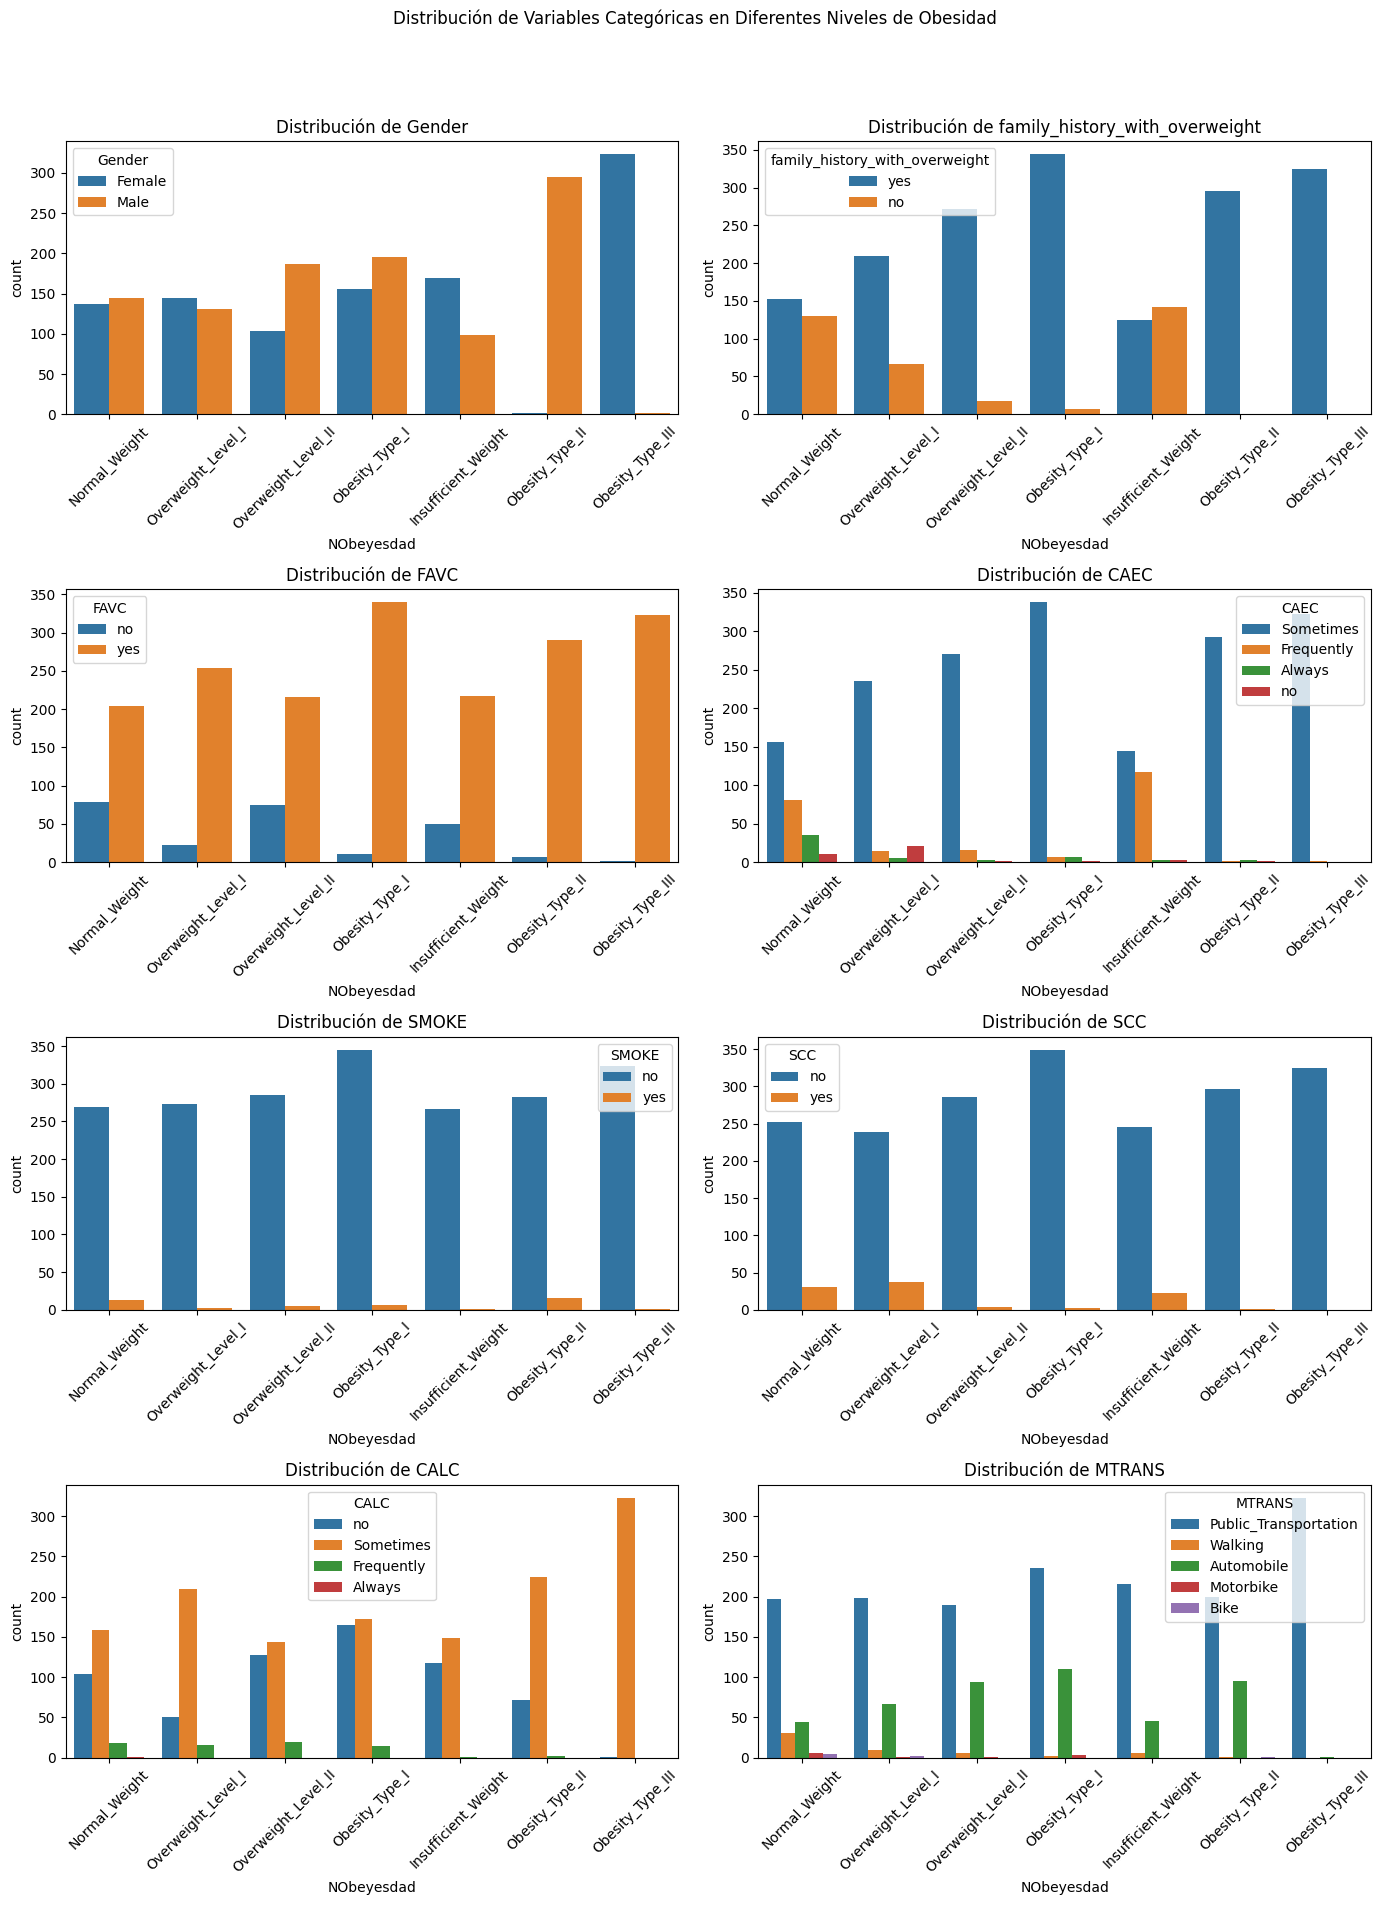

In [ ]:
# Variables categóricas en el conjunto de datos
categorical_vars = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

# Variables numéricas en el conjunto de datos
numerical_vars = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Crear subgráficos para variables categóricas
fig, axes = plt.subplots(4, 2, figsize=(14, 20))
fig.suptitle('Distribución de Variables Categóricas en Diferentes Niveles de Obesidad')

for i, var in enumerate(categorical_vars):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.countplot(data=df, x='NObeyesdad', hue=var, ax=ax)
    ax.set_title(f'Distribución de {var}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

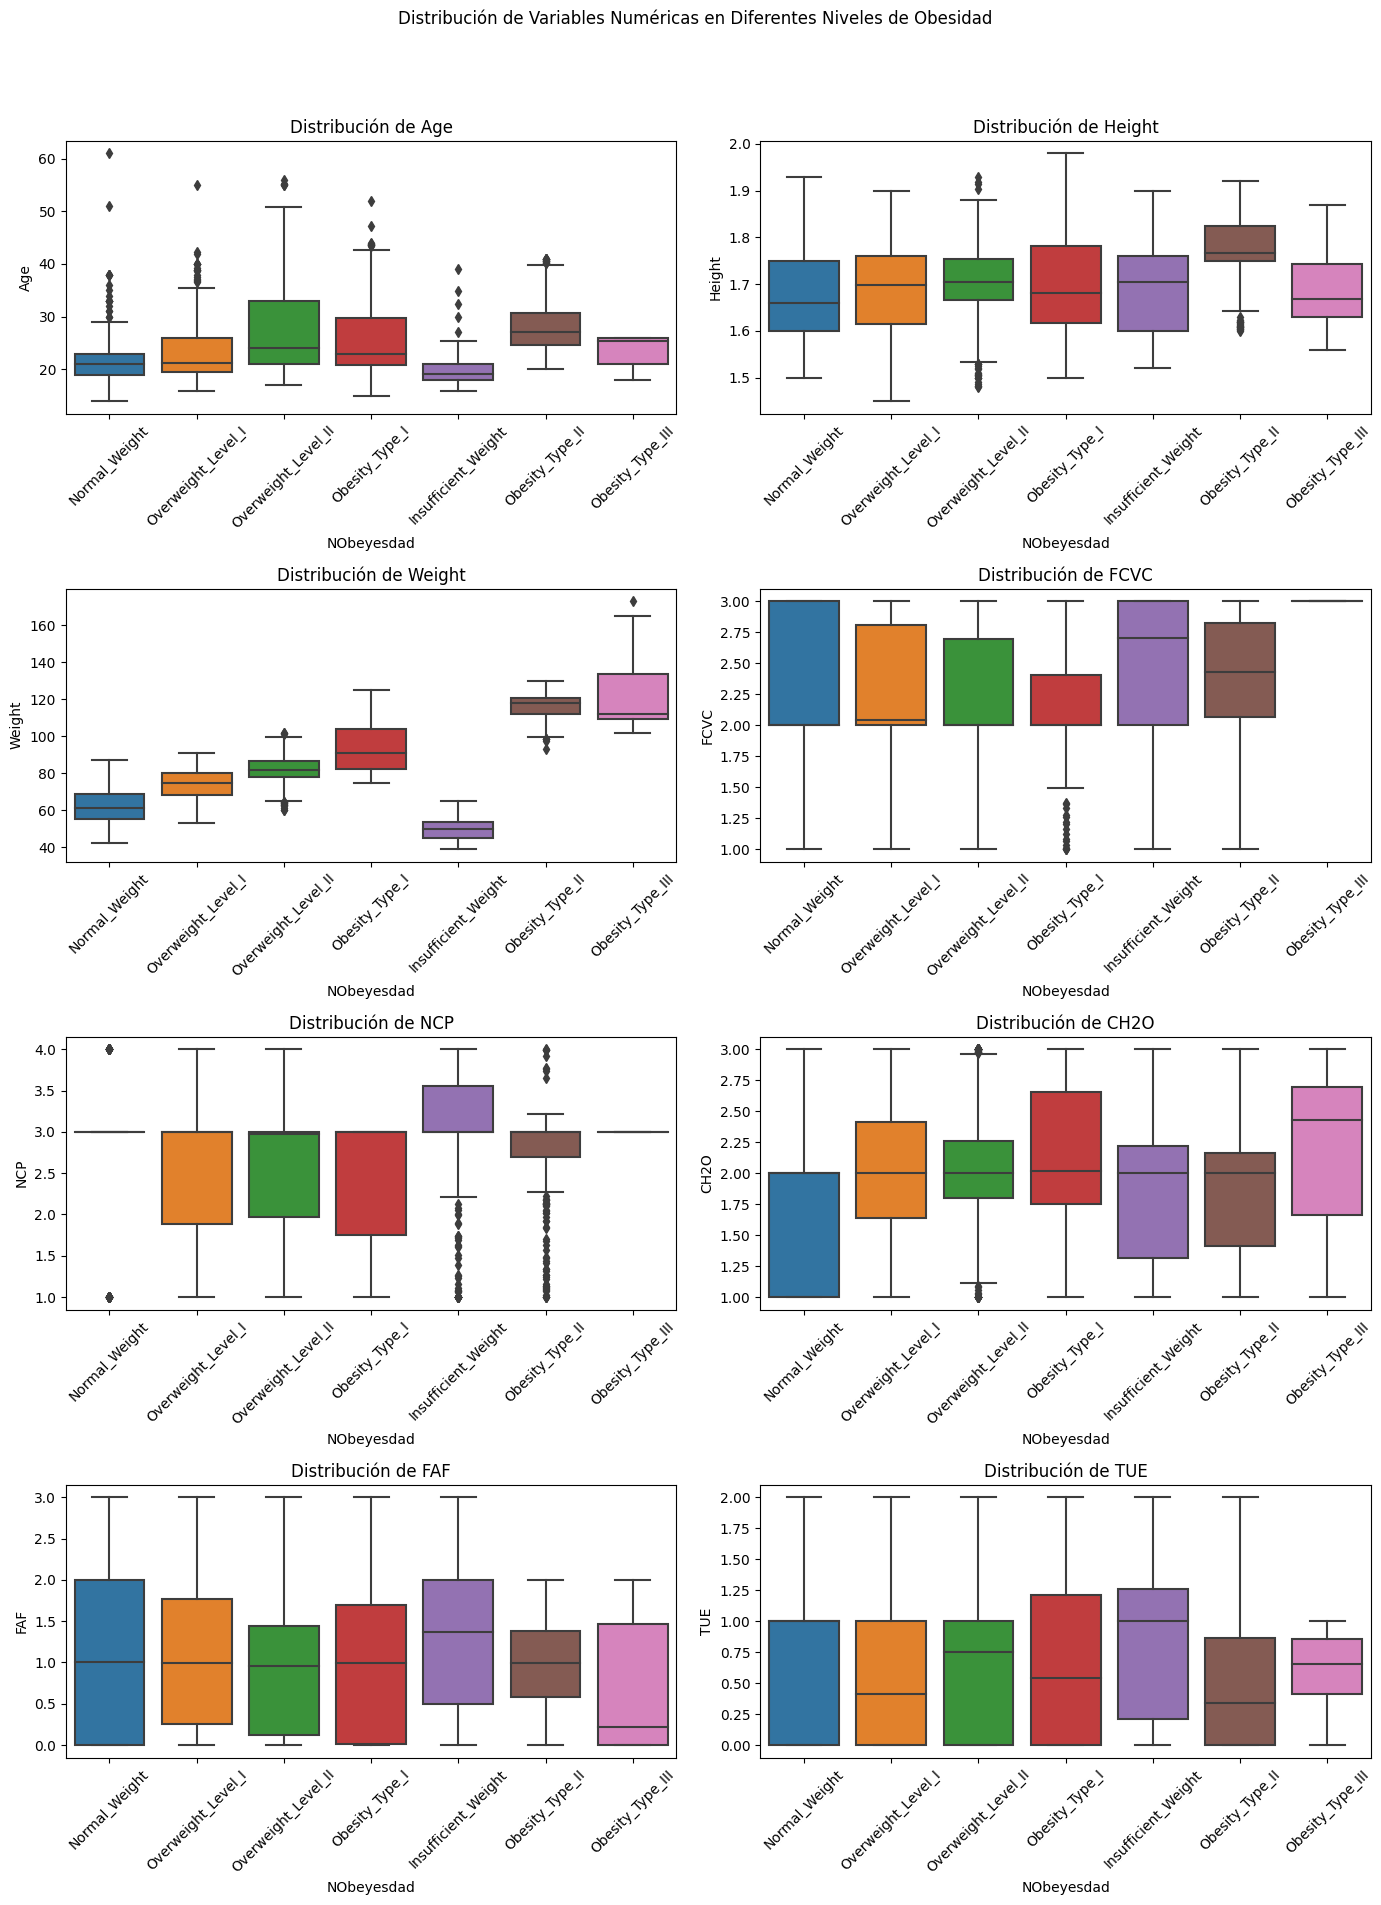

In [ ]:
# Crear subgráficos para variables numéricas
fig, axes = plt.subplots(4, 2, figsize=(14, 20))
fig.suptitle('Distribución de Variables Numéricas en Diferentes Niveles de Obesidad')

for i, var in enumerate(numerical_vars):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.boxplot(data=df, x='NObeyesdad', y=var, ax=ax)
    ax.set_title(f'Distribución de {var}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



# Variables Categóricas
* Género: Se observa que en la categoría de "Obesity Type II" tiene prevalencia significativa de hombres y "Obesity Type III" tiene prevalencia significativa de mujeres.
* Historial Familiar con Sobrepeso: En todos los niveles de obesidad, una gran mayoría tiene un historial familiar con sobrepeso.
* FAVC (Consumo Frecuente de Alimentos Altos en Calorías): La mayoría de las personas en todas las categorías de obesidad parecen consumir alimentos altos en calorías con frecuencia.
* CAEC (Consumo de Alimentos Entre Comidas): La mayoría de las personas en todas las categorías de obesidad parecen consumir alimentos Entre Comidas con frecuencia "sometimes".
* Fumar: La mayoría de las personas en todas las categorías de obesidad no fuman.
* SCC (Monitoreo del Consumo de Calorías): La mayoría de las personas en todas las categorías de obesidad no monitorean su consumo de calorías.
* CALC (Consumo de Alcohol): El consumo de alcohol es variado y no muestra un patrón claro en relación con los niveles de obesidad.
* MTRANS (Medio de Transporte): La mayoría de las personas utilizan transporte público , especialmente en las categorías de obesidad.
# Variables Numéricas
* Edad: La mediana de la edad parece ser mayor en las categorías de "Obesity type II" y "Obesity Type III".
* Altura: No hay diferencias significativas en la altura entre las diferentes categorías de obesidad.
* Peso: Como es de esperar, el peso aumenta con el nivel de obesidad.
* FCVC (Frecuencia de Consumo de Vegetales): No hay un patrón claro, pero en general, la mediana es ligeramente más alta en las categorías de obesidad.
* NCP (Número de Comidas Principales): No hay diferencias significativas en el número de comidas principales entre las diferentes categorías de obesidad.
* CH2O (Consumo Diario de Agua): No hay un patrón claro en el consumo diario de agua entre las diferentes categorías de obesidad.
* FAF (Frecuencia de Actividad Física): En general, la actividad física parece ser menor en las categorías de mayor obesidad.
* TUE (Tiempo Usando Dispositivos Electrónicos): No hay un patrón claro en el Tiempo Usando Dispositivos Electrónicos con la obesidad.

# ¿Existen interacciones significativas entre las variables que podrían afectar su relación con la obesidad?

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Codificación de variables categóricas para el conjunto de datos original
df_encoded = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

# Estandarizar las variables numéricas en el conjunto de datos original
scaler = StandardScaler()
df_encoded[numerical_vars] = scaler.fit_transform(df_encoded[numerical_vars])

# Definir las variables simplificadas que se usarán en el modelo de árbol de decisión
simplified_vars = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Obtener los nombres de las columnas codificadas que corresponden a las variables categóricas simplificadas
encoded_categorical_vars = [col for col in df_encoded.columns if any(cvar in col for cvar in categorical_vars)]

# Definir las variables simplificadas incluyendo las variables numéricas y las variables categóricas codificadas
simplified_vars = numerical_vars + encoded_categorical_vars

# Eliminar valores atípicos extremos usando el método Z-score
z_scores = np.abs(stats.zscore(df_encoded[simplified_vars]))
df_encoded_no_outliers = df_encoded[(z_scores < 3).all(axis=1)]

# Definir las variables X y y para el modelo de árbol de decisión
X_simplified = df_encoded_no_outliers[simplified_vars]
y_no_outliers = df_encoded_no_outliers['NObeyesdad']

# Utilizar un árbol de decisión para explorar las interacciones entre variables
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)  # Limitamos la profundidad del árbol para interpretación
tree_clf.fit(X_simplified, y_no_outliers)

# Mostrar las reglas del árbol de decisión
tree_rules = export_text(tree_clf, feature_names=list(X_simplified.columns))
tree_rules

'|--- Weight <= 0.48\n|   |--- Weight <= -0.96\n|   |   |--- Height <= -0.46\n|   |   |   |--- class: Normal_Weight\n|   |   |--- Height >  -0.46\n|   |   |   |--- class: Insufficient_Weight\n|   |--- Weight >  -0.96\n|   |   |--- Weight <= -0.41\n|   |   |   |--- class: Overweight_Level_I\n|   |   |--- Weight >  -0.41\n|   |   |   |--- class: Obesity_Type_I\n|--- Weight >  0.48\n|   |--- Gender_Male <= 0.50\n|   |   |--- CH2O <= -1.65\n|   |   |   |--- class: Obesity_Type_II\n|   |   |--- CH2O >  -1.65\n|   |   |   |--- class: Obesity_Type_III\n|   |--- Gender_Male >  0.50\n|   |   |--- Age <= -0.29\n|   |   |   |--- class: Obesity_Type_I\n|   |   |--- Age >  -0.29\n|   |   |   |--- class: Obesity_Type_II\n'

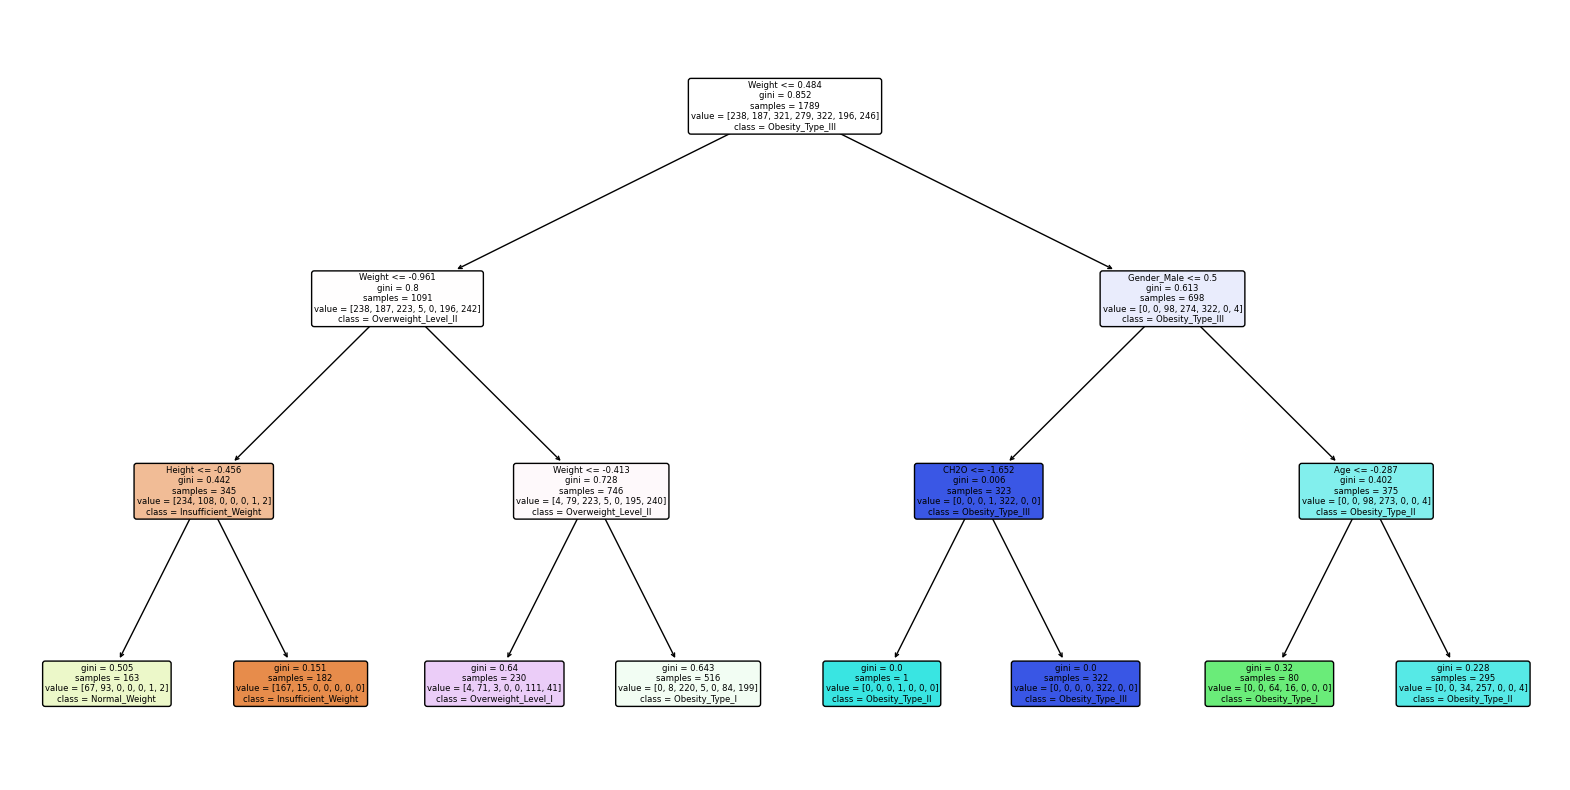

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(tree_clf, feature_names=X_simplified.columns, class_names=tree_clf.classes_, filled=True, rounded=True)
plt.show()




# explicacion del arbol de decision
* Primera división (Weight <= 0.48): Si el peso (estandarizado) es menor o igual a 0.48, seguimos por la rama izquierda del árbol. De lo contrario, vamos a la rama derecha.
 * Rama izquierda (Weight <= -0.96): Aquí hay otra división basada en el peso. Si el peso es menor o igual a -0.96, vamos a la siguiente subdivisión que se basa en la altura.
    * Si la altura es menor o igual a -0.46, la clase resultante es "Normal_Weight".
    * Si la altura es mayor que -0.46, la clase resultante es "Insufficient_Weight".
   * Si el peso es mayor que -0.96 pero menor o igual a -0.41, la clase resultante es "Overweight_Level_I".
   * Si el peso es mayor que -0.41, la clase resultante es "Obesity_Type_I".
* Rama derecha (Weight > 0.48): Aquí la primera subdivisión se basa en el género.
 * Si el género es masculino (Gender_Male <= 0.50), la siguiente subdivisión se basa en el consumo diario de agua (CH2O).
   * Si CH2O <= -1.65, la clase resultante es "Obesity_Type_II".
   *  Si CH2O > -1.65, la clase resultante es "Obesity_Type_III".
 * Si el género es femenino (Gender_Male > 0.50), la siguiente subdivisión se basa en la edad.
   * Si Age <= -0.29, la clase resultante es "Obesity_Type_I".
   * Si Age > -0.29, la clase resultante es "Obesity_Type_II".

# interacciones significativas de las variables

* Peso y Altura: Estas dos variables interactúan de tal manera que una persona con un peso más bajo puede caer en la categoría de "Peso Normal" o "Peso Insuficiente" dependiendo de su altura.

* Peso y Género: El género parece tener un impacto diferencial en la clasificación de la obesidad cuando se tiene en cuenta junto con el peso. Por ejemplo, para personas con un peso estandarizado mayor que 0.48, el género influye en si se clasifican como "Obesidad Tipo II" o "Obesidad Tipo III".

* Género y Consumo de Agua (CH2O): Estas variables interactúan para determinar si una persona con un peso estandarizado mayor que 0.48 y género masculino caerá en la categoría de "Obesidad Tipo II" o "Obesidad Tipo III".

* Género y Edad: En el caso de personas con género femenino y un peso estandarizado mayor que 0.48, la edad decide si se clasifican como "Obesidad Tipo I" o "Obesidad Tipo II".


# ¿Cómo se distribuye las obesidad en diferentes poblaciones?

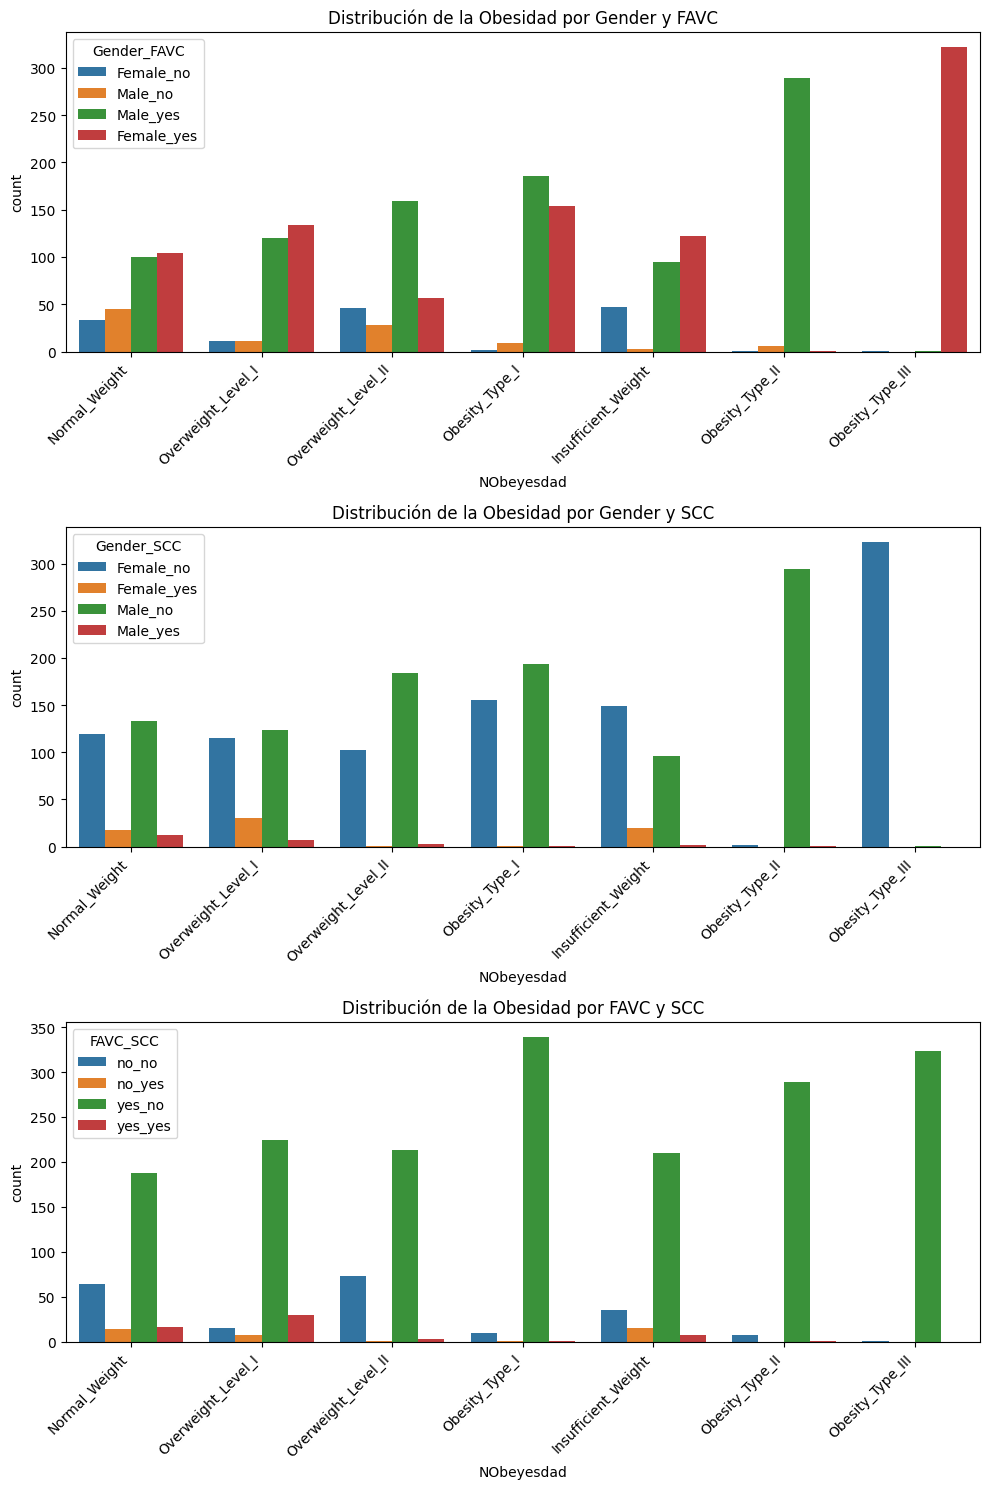

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear combinaciones de variables para distintas poblaciones
# Combinación 1: Género y Consumo frecuente de alimentos altos en calorías (FAVC)
# Combinación 2: Género y Monitoreo del consumo de calorías (SCC)
# Combinación 3: Consumo frecuente de alimentos altos en calorías (FAVC) y Monitoreo del consumo de calorías (SCC)

combinations = [
    ('Gender', 'FAVC'),
    ('Gender', 'SCC'),
    ('FAVC', 'SCC')
]

# Creamos nuevas columnas que representan las combinaciones de variables para distintas poblaciones
df['Gender_FAVC'] = df['Gender'] + '_' + df['FAVC']
df['Gender_SCC'] = df['Gender'] + '_' + df['SCC']
df['FAVC_SCC'] = df['FAVC'] + '_' + df['SCC']

# Plotear cómo varía la obesidad en estas poblaciones
fig, axes = plt.subplots(len(combinations), 1, figsize=(10, 15))

for i, (var1, var2) in enumerate(combinations):
    sns.countplot(data=df, x='NObeyesdad', hue=f'{var1}_{var2}', ax=axes[i])
    axes[i].set_title(f'Distribución de la Obesidad por {var1} y {var2}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


# Distribución de la Obesidad por Género y Consumo frecuente de alimentos altos en calorías (FAVC):

* Las mujeres que consumen frecuentemente alimentos altos en calorías tienden a tener niveles más altos de obesidad Tipo III en comparación con los hombres.
* Los hombres que no consumen frecuentemente alimentos altos en calorías tienen una mayor tendencia a ser clasificados como "Normal_Weight".
# Distribución de la Obesidad por Género y Monitoreo del consumo de calorías (SCC):

* Las mujeres que no monitorean su consumo de calorías tienen una mayor tendencia a la obesidad Tipo III.
* Los hombres que monitorean su consumo de calorías tienden a ser clasificados más frecuentemente como "Normal_Weight" o "Overweight_Level_I".
# Distribución de la Obesidad por Consumo frecuente de alimentos altos en calorías (FAVC) y Monitoreo del consumo de calorías (SCC):

* Las personas que consumen frecuentemente alimentos altos en calorías y no monitorean su consumo de calorías tienen una mayor propensión a la obesidad Tipo III.
* Aquellos que no consumen alimentos altos en calorías y monitorean su consumo tienden a tener un peso "Normal" o son "insufficent weight".

#  ¿Qué variables muestran una tendencia temporal en relación con la obesidad?

<ipython-input-20-aad4e36579ff>:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(['Age_Range', 'Weight_Category']).mean().reset_index()
<ipython-input-20-aad4e36579ff>:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(['Age_Range', 'Weight_Category']).mean().reset_index()
<ipython-input-20-aad4e36579ff>:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.g

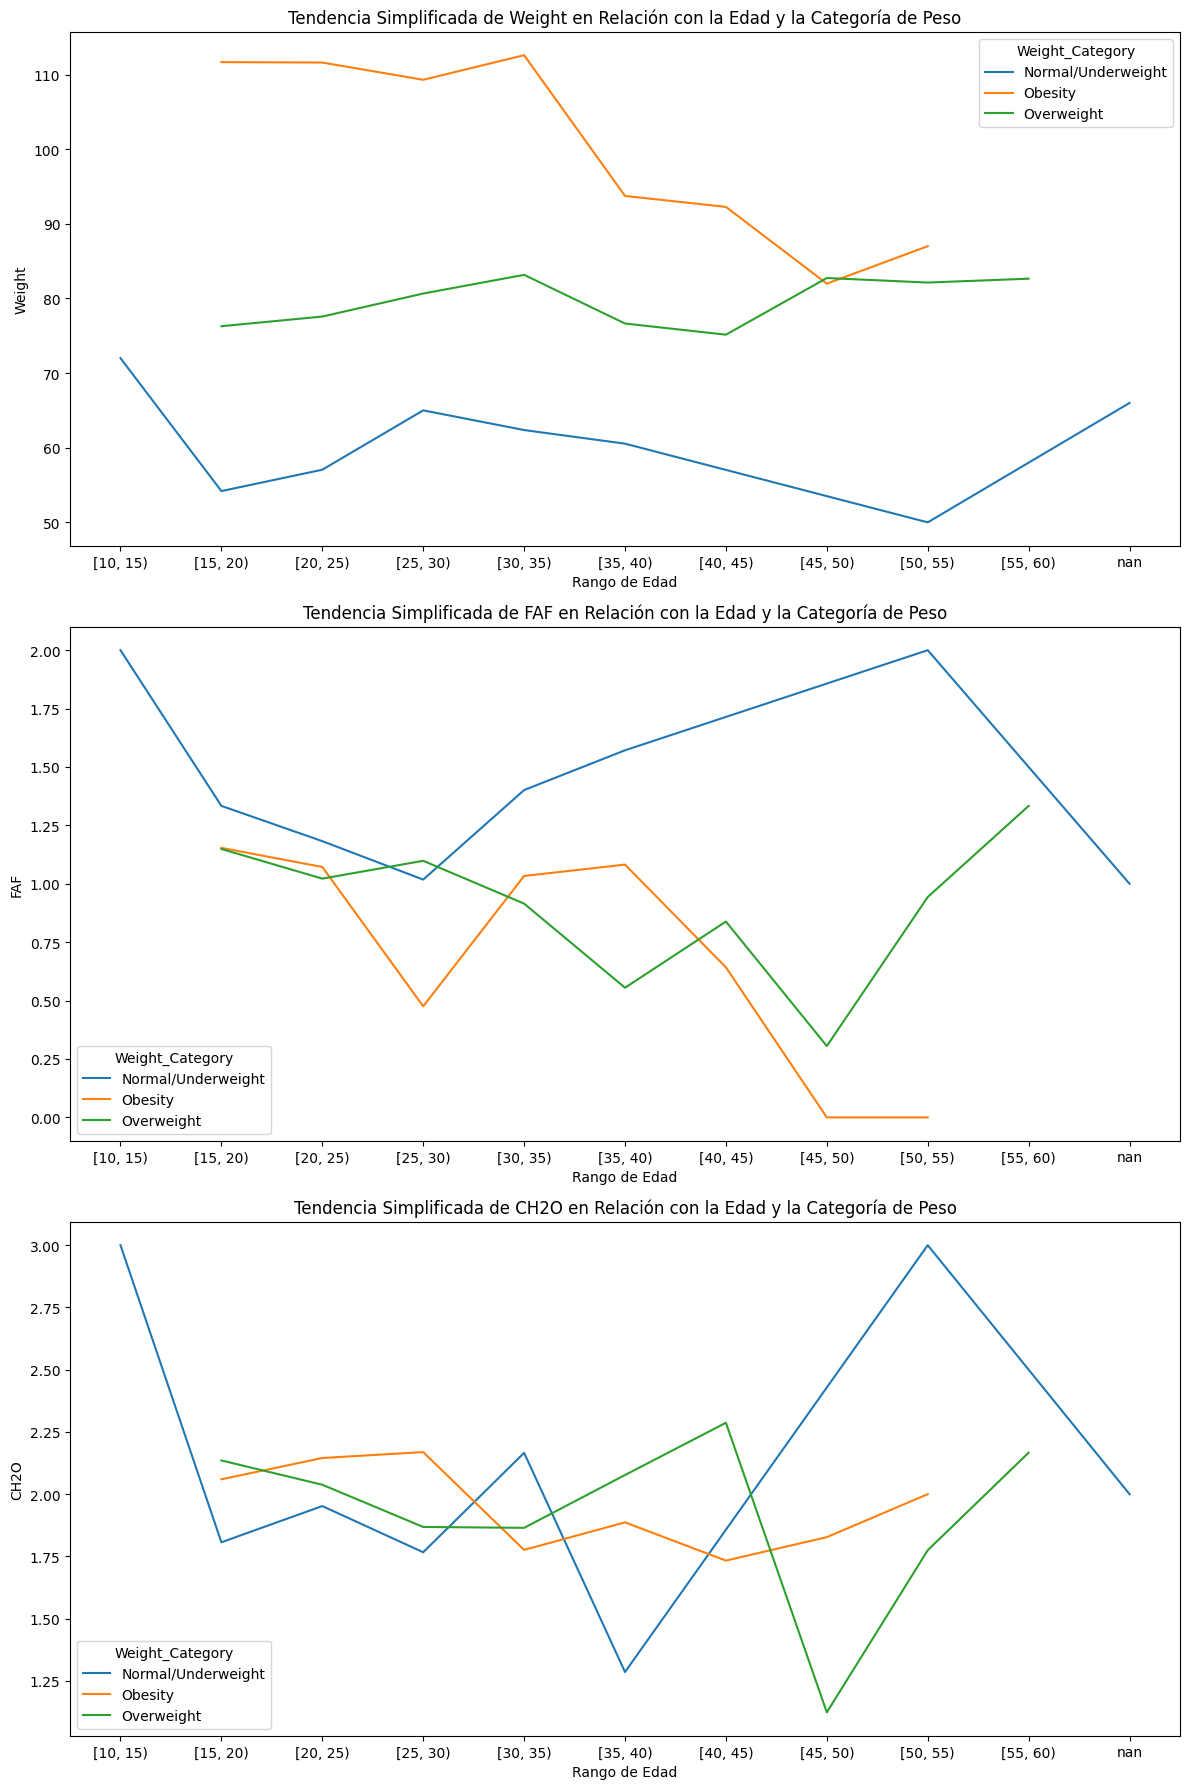

In [ ]:
# Generar gráficos para observar tendencias temporales en relación con la "Edad"
variables_to_plot = ['Weight', 'FAF', 'CH2O']

# Crear una nueva columna en el DataFrame para agrupar las categorías de obesidad
df['Weight_Category'] = df['NObeyesdad'].apply(lambda x: 'Obesity' if 'Obesity' in x else ('Overweight' if 'Overweight' in x else 'Normal/Underweight'))

# Simplificar los gráficos agrupando la edad en rangos y calculando la media de las otras variables dentro de esos rangos.
# Vamos a usar rangos de 5 años para la edad.

# Crear una nueva columna para los rangos de edad
df['Age_Range'] = pd.cut(df['Age'], bins=range(0, 65, 5), right=False)

# Convertir la columna 'Age_Range' a tipo de dato string para evitar errores en la visualización
df['Age_Range'] = df['Age_Range'].astype(str)

# Generar gráficos para observar tendencias temporales en relación con la "Edad"
# Configuración del gráfico
fig, axes = plt.subplots(len(variables_to_plot), 1, figsize=(12, 18))

# Iterar a través de cada variable para trazar
for i, var in enumerate(variables_to_plot):
    df_grouped = df.groupby(['Age_Range', 'Weight_Category']).mean().reset_index()
    sns.lineplot(data=df_grouped, x='Age_Range', y=var, hue='Weight_Category', ax=axes[i])
    axes[i].set_title(f'Tendencia Simplificada de {var} en Relación con la Edad y la Categoría de Peso')
    axes[i].set_xlabel('Rango de Edad')
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()


# Tendencia del Peso en Relación con la Edad y la Categoría de Peso:

* El peso parece tender a aumentar con la edad en todas las categorías, aunque teniendo en cuenta que en un momento el peso baja mientras que la edad auemnta en la categoría de "Obesidad".

# Tendencia de la Frecuencia de Actividad Física (FAF) en Relación con la Edad y la Categoría de Peso:

* La frecuencia de actividad física tiende a disminuir con la edad en las categorías de "Obesidad" y "peso normal".

# Tendencia del Consumo de Agua (CH2O) en Relación con la Edad y la Categoría de Peso:

* El consumo de agua parece ser bastante constante a lo largo de las diferentes edades y no muestra una tendencia clara entre las categorías de peso

# ¿Qué variables tienen mayor influencia en la obesidad?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Codificar la variable objetivo 'NObeyesdad' y las variables categóricas con el método get_dummies
# Aquí solo codificamos las variables categóricas una vez, y no tocamos 'NObeyesdad' en este paso
df_encoded = pd.get_dummies(df[['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']], drop_first=True)


# Combinar las variables numéricas con las variables categóricas codificadas
df_combined = pd.concat([df[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']], df_encoded], axis=1)

# Definir las variables independientes (X) y la variable objetivo (y)
# Aquí usamos 'NObeyesdad' directamente del DataFrame original como variable objetivo
X = df_combined
y = df['NObeyesdad']


# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar un modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Evaluar el rendimiento del modelo
evaluation_report = classification_report(y_test, y_pred)

# Obtener la importancia de las variables
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_}).sort_values(by='Importance', ascending=False)

evaluation_report, feature_importance.head(10)


('                     precision    recall  f1-score   support\n\nInsufficient_Weight       1.00      0.90      0.95        59\n      Normal_Weight       0.81      0.95      0.87        61\n     Obesity_Type_I       1.00      0.97      0.99        70\n    Obesity_Type_II       1.00      1.00      1.00        64\n   Obesity_Type_III       1.00      1.00      1.00        60\n Overweight_Level_I       0.94      0.89      0.92        55\nOverweight_Level_II       0.96      0.96      0.96        49\n\n           accuracy                           0.95       418\n          macro avg       0.96      0.95      0.95       418\n       weighted avg       0.96      0.95      0.96       418\n',
                               Feature  Importance
 2                              Weight    0.300640
 1                              Height    0.094537
 0                                 Age    0.092836
 3                                FCVC    0.086570
 8                         Gender_Male    0.058902
 4 

# Informe de Evaluación del Modelo
La precisión general del modelo de Random Forest es del 95%, lo que sugiere que el modelo es bastante preciso para clasificar los diferentes niveles de obesidad.

# Importancia de las Características
Las 10 variables más importantes según el modelo de Random Forest son:

* Peso (Importancia: ~0.30)
* Altura (Importancia: ~0.09)
* Edad (Importancia: ~0.09)
* FCVC (Frecuencia de consumo de vegetales) (Importancia: ~0.09)
* Género (Masculino) (Importancia: ~0.059)
* NCP (Número de comidas principales) (Importancia: ~0.055)
* TUE (Tiempo usando dispositivos electrónicos) (Importancia: ~0.049)
* FAF (Frecuencia de actividad física) (Importancia: ~0.049)
* CH2O (Consumo diario de agua) (Importancia: ~0.048)
* Historial familiar con sobrepeso (Importancia: ~0.031)